In [218]:
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from gait_dataset import GaitDataset
from scipy.signal import find_peaks
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['font.size'] = 14

import numpy as np
import pandas as pd
from cmap import Colormap
import seaborn as sns

Text(0.5, 1.0, 'Oxene PCA')

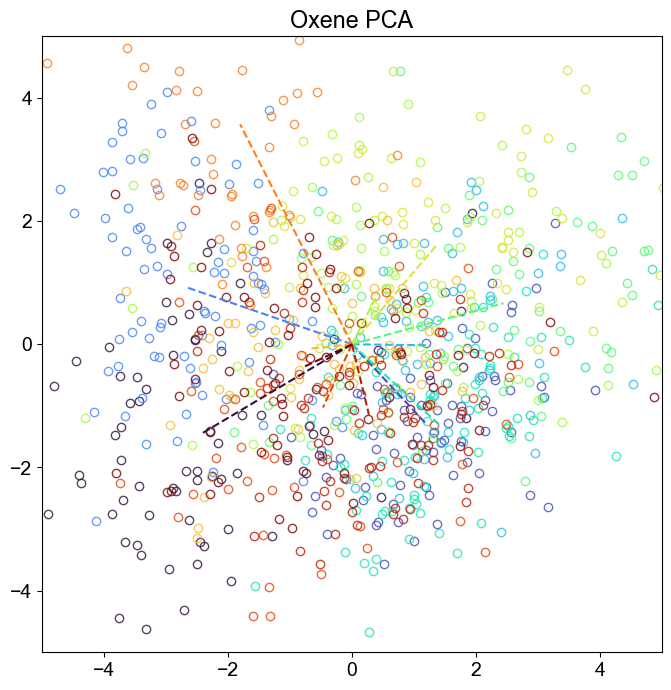

In [232]:
ds = torch.load('dataset/gait_o.pt')

# normal = [1, 3, 5, 7, 8, 9, 10]

features_min = np.min(ds.features.numpy(), axis=2)
features_max = np.max(ds.features.numpy(), axis=2)
features_avg = np.mean(ds.features.numpy(), axis=2)
feature_peak_locs = np.zeros((ds.features.shape[0], ds.features.shape[1]))

for f, feature in enumerate(ds.features):
    for c, ch in enumerate(feature):
        peaks, _ = find_peaks(ch, distance=800)
        if c > 3:
            feature_peak_locs[f, c] = peaks[0]
        else:
            feature_peak_locs[f, c] = peaks[-1]

x = np.column_stack((features_avg, feature_peak_locs))
y = ds.labels.numpy()

x = StandardScaler().fit_transform(x)

pca_o = PCA(n_components=12)
principle_components_o = pca_o.fit_transform(x)

group_centers = []
for label in np.unique(y):
    group_centers.append(np.mean(principle_components_o[y == label], axis=0))

colors = Colormap('google:turbo')(np.linspace(0, 1, len(np.unique(y))))

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot()

for idx, pc in enumerate(principle_components_o):
    ax.plot(pc[0], pc[1], 'o',
            mfc='None',
            mec=colors[int(y[idx])],
            alpha=0.8)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

for idx, gc in enumerate(group_centers):
    ax.plot((0, gc[0]),
            (0, gc[1]),
            '--',
            c=colors[idx])

plt.title('Oxene PCA')

In [276]:
feature_names = ['avg1', 'avg2', 'avg3', 'avg4', 'avg5', 'avg6', 'avg7', 'avg8',
                 'peak1', 'peak2', 'peak3', 'peak4', 'peak5', 'peak6', 'peak7', 'peak8']
# color_idx_list = [0, 1, 2, 3] * 4
colors = ['#070F2B', '#1B1A55', '#535C91', '#9290C3',  # blue
          '#4F6F52', '#739072', '#86A789', '#D2E3C8',  # green
          '#6B240C', '#994D1C', '#E48F45', '#F5CCA0',  # orange
          '#863A6F', '#975C8D', '#D989B5', '#FFADBC',  # pink        
         ]

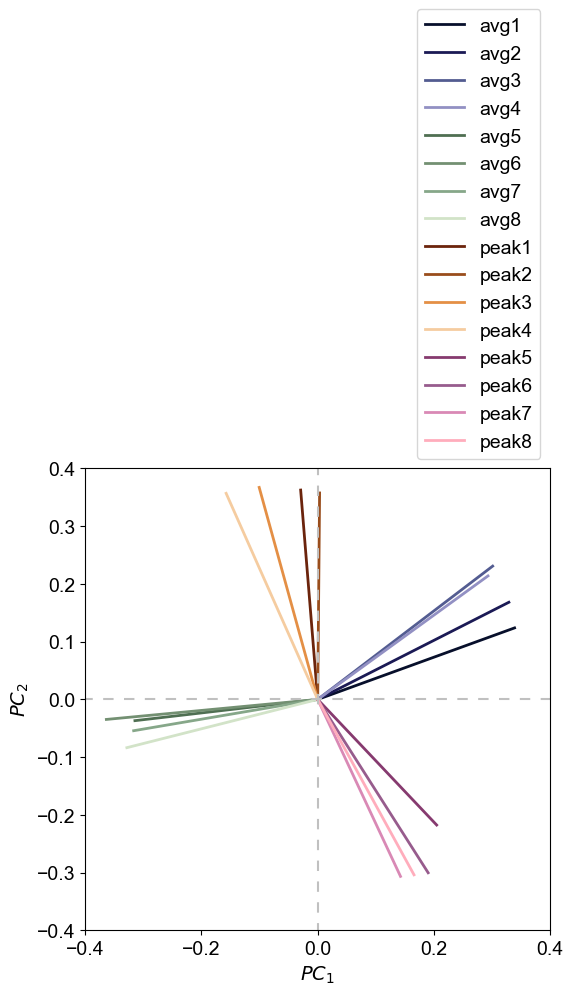

In [293]:
pc1 = pca_o.components_[0, :]
pc2 = pca_o.components_[1, :]
# pc3 = pca_o.components_[2, :]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
# ax = fig.add_subplot(projection='3d')
# ax.view_init(elev=30, azim=45)

for idx in range(pca_o.components_.shape[1]):
    ax.plot([pc1[idx], 0],
            [pc2[idx], 0],
        #     [pc3[idx], 0],
            c=colors[idx], lw=2, label=feature_names[idx])
#     ax.text(pc1[idx], pc2[idx],
#             pc3[idx],
#             feature_names[idx])

ax.plot([0, 0], [-1, 1], c='silver', ls=(0, (5, 5)))
ax.plot([-1, 1], [0, 0], c='silver', ls=(0, (5, 5)))

ax.set_xlabel('$PC_1$')
ax.set_ylabel('$PC_2$')
# ax.set_zlabel('PC3')

ax.set_xlim(-0.4, 0.4)
ax.set_ylim(-0.4, 0.4)

ax.legend(bbox_to_anchor=(1, 1), loc='lower right')
plt.savefig('results/pca.png', dpi=600, bbox_inches='tight')

In [163]:
print(pca_o.explained_variance_ratio_)
print(pca_o.explained_variance_ratio_[:8].sum())

[0.28612902 0.23802538 0.08142375 0.0649387  0.05650083 0.04289926
 0.03435436 0.02928123 0.02705166 0.02568405 0.02441163 0.0211255 ]
0.8335525253457026


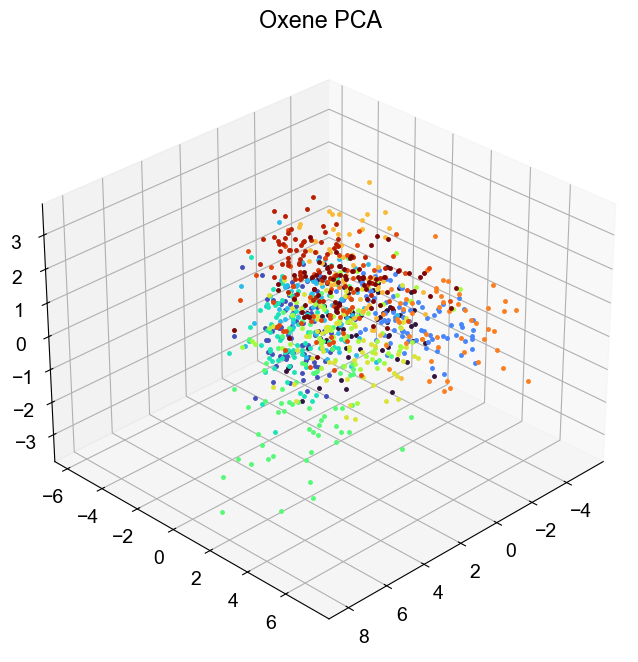

In [310]:
ds = torch.load('dataset/gait_o.pt')

features_min = np.min(ds.features.numpy(), axis=2)
features_max = np.max(ds.features.numpy(), axis=2)
features_avg = np.mean(ds.features.numpy(), axis=2)
feature_peak_locs = np.zeros((ds.features.shape[0], ds.features.shape[1]))
for f, feature in enumerate(ds.features):
    for c, ch in enumerate(feature):
        peaks, _ = find_peaks(ch, distance=800)
        if c > 3:
            feature_peak_locs[f, c] = peaks[0]
        else:
            feature_peak_locs[f, c] = peaks[-1]
x = np.column_stack((features_avg, feature_peak_locs))
y = ds.labels.numpy()

x = StandardScaler().fit_transform(x)

pca_o = PCA(n_components=12)
principle_components_o = pca_o.fit_transform(x)

group_centers = []
for label in np.unique(y):
    group_centers.append(np.mean(principle_components_o[y == label], axis=0))

colors = Colormap('google:turbo')(np.linspace(0, 1, len(np.unique(y))))

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=45)

for idx, pc in enumerate(principle_components_o):
    ax.plot(pc[0], pc[1], pc[2], '.',
            ms=5,
            c=colors[int(y[idx])])
    # ax.set_xlim(-5, 5)
    # ax.set_ylim(-5, 5)
    # ax.set_zlim(-5, 5)

# for idx, gc in enumerate(group_centers):
#     ax.plot((0, gc[0]),
#             (0, gc[1]),
#             (0, gc[2]),
#             c=colors[idx])
# plt.legend()

plt.title('Oxene PCA')
plt.savefig('results/oxene_pca.png', dpi=600, bbox_inches='tight')

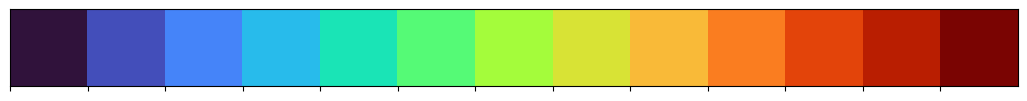

In [311]:
sns.palplot(Colormap('google:turbo')(np.linspace(0, 1, len(np.unique(y)))))
plt.savefig('results/color_palette.png')

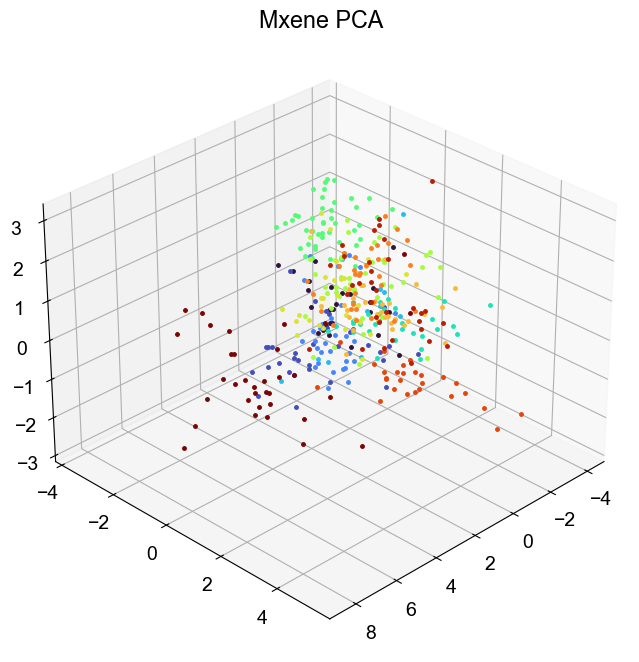

In [315]:
ds = torch.load('dataset/gait_m1.pt')

features_min = np.min(ds.features.numpy(), axis=2)
features_max = np.max(ds.features.numpy(), axis=2)
features_avg = np.mean(ds.features.numpy(), axis=2)
feature_peak_locs = np.zeros((ds.features.shape[0], ds.features.shape[1]))
for f, feature in enumerate(ds.features):
    for c, ch in enumerate(feature):
        peaks, _ = find_peaks(ch, distance=800)
        if c > 3:
            feature_peak_locs[f, c] = peaks[0]
        else:
            feature_peak_locs[f, c] = peaks[-1]
x = np.column_stack((features_avg, feature_peak_locs))
y = ds.labels.numpy()

x = StandardScaler().fit_transform(x)

pca_m = PCA(n_components=12)
principle_components_m = pca_m.fit_transform(x)

group_centers = []
for label in np.unique(y):
    group_centers.append(np.mean(principle_components_m[y == label], axis=0))

colors = Colormap('google:turbo')(np.linspace(0, 1, len(np.unique(y))))

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=45)

for idx, pc in enumerate(principle_components_m):
    ax.plot(pc[0], pc[1], pc[2], '.',
            ms=5,
            c=colors[int(y[idx])])
#     ax.set_xlim(-5, 5)
#     ax.set_ylim(-5, 5)
#     ax.set_zlim(-5, 5)

# for idx, gc in enumerate(group_centers):
#     ax.plot((0, gc[0]),
#             (0, gc[1]),
#             (0, gc[2]),
#             c=colors[idx])
    
plt.title('Mxene PCA')
plt.savefig('results/mxene_pca.png', dpi=600, bbox_inches='tight')

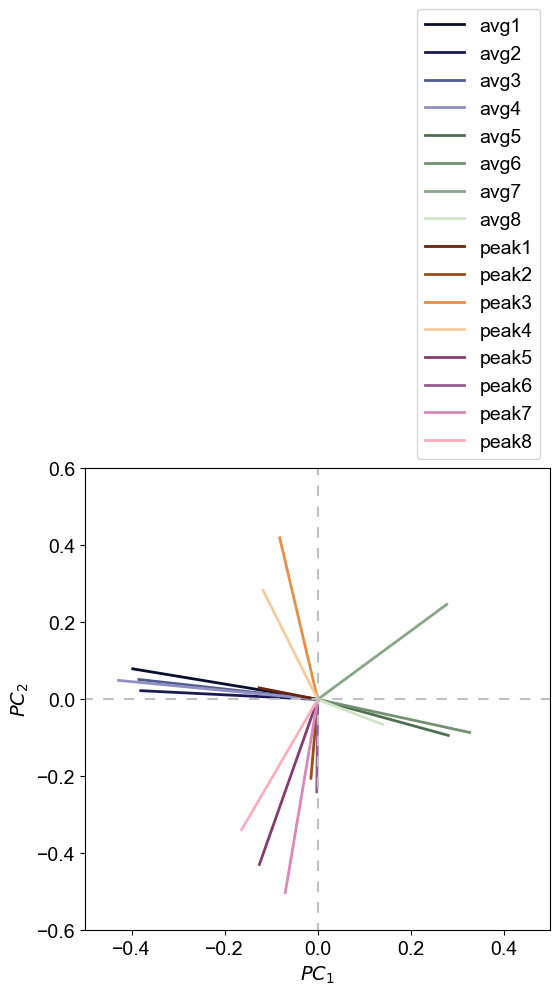

In [298]:
pc1 = pca_m.components_[0, :]
pc2 = pca_m.components_[1, :]
# pc3 = pca_o.components_[2, :]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
# ax = fig.add_subplot(projection='3d')
# ax.view_init(elev=30, azim=45)

for idx in range(pca_m.components_.shape[1]):
    ax.plot([pc1[idx], 0],
            [pc2[idx], 0],
        #     [pc3[idx], 0],
            c=colors[idx], lw=2, label=feature_names[idx])
#     ax.text(pc1[idx], pc2[idx],
#             pc3[idx],
#             feature_names[idx])

ax.plot([0, 0], [-1, 1], c='silver', ls=(0, (5, 5)))
ax.plot([-1, 1], [0, 0], c='silver', ls=(0, (5, 5)))

ax.set_xlabel('$PC_1$')
ax.set_ylabel('$PC_2$')
# ax.set_zlabel('PC3')

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.6, 0.6)

ax.legend(bbox_to_anchor=(1, 1), loc='lower right')
plt.savefig('results/pca_m.png', dpi=600, bbox_inches='tight')

In [164]:
print(pca_m.explained_variance_ratio_)
print(pca_m.explained_variance_ratio_[:8].sum())

[0.24259977 0.09821122 0.0949057  0.08579742 0.06875538 0.06120769
 0.05602729 0.05353044 0.05113775 0.0412204  0.03772197 0.03116246]
0.7610349071578945
